In [1]:
import pandas as pd
import numpy as np

pitcher = pd.read_csv('mlb-player-stats-P.csv')
batter = pd.read_csv('mlb-player-stats-Batters.csv')

pitcher.head()

,Player,Team,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
0,Justin Verlander,HOU,34,34,2,1,223.0,137,64,300,42,36,21,6,0,0,0,2.58,0.80
1,Shane Bieber,CLE,34,33,3,2,214.1,186,78,259,40,31,15,8,0,0,0,3.28,1.05
2,Gerrit Cole,HOU,33,33,0,0,212.1,142,59,326,48,29,20,5,0,0,0,2.50,0.89
3,Stephen Strasburg,WAS,33,33,0,0,209.0,161,77,251,56,24,18,6,0,0,0,3.32,1.04
4,Mike Minor,TEX,32,32,2,1,208.1,190,83,200,68,30,14,10,0,0,0,3.59,1.24


In [2]:
batter.head()

,Player,Team,Pos,G,AB,R,H,2B,3B,HR,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Whit Merrifield,KC,2B,162,681,105,206,41,10,16,...,10,45,126,0,4,5,0.302,0.348,0.463,0.811
1,Marcus Semien,OAK,SS,162,657,123,187,43,7,33,...,8,87,102,0,1,2,0.285,0.369,0.522,0.891
2,Rafael Devers,BOS,3B,156,647,129,201,54,4,32,...,8,48,119,1,2,4,0.311,0.361,0.555,0.916
3,Jonathan Villar,BAL,2B,162,642,111,176,33,5,24,...,9,61,176,2,4,4,0.274,0.339,0.453,0.792
4,Ozzie Albies,ATL,2B,160,640,102,189,43,8,24,...,4,54,112,0,4,4,0.295,0.352,0.500,0.852


In [3]:
print(pitcher.shape)
print(batter.shape)

(872, 19)
(694, 22)


## 변수들 관의 관계

### 1. 타율(AVG)과 홈런(HR): scatter plot

Text(0, 0.5, 'HR')

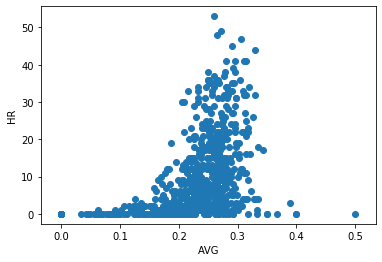

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(batter.AVG, batter.HR)
ax.set_xlabel('AVG')
ax.set_ylabel('HR')

### 2. 주요 선수 표시

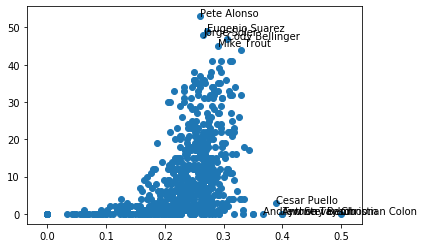

In [5]:
hrtop5 = list(batter['HR'].nlargest(5).index)
avgtop5 = list(batter['AVG'].nlargest(5).index)

fig, ax = plt.subplots()
ax.scatter(batter['AVG'].values, batter['HR'].values)

for i in set(hrtop5 + avgtop5):
    ax.annotate(batter.loc[i, 'Player'], (batter.loc[i, 'AVG'], batter.loc[i, 'HR']))

### 3. 겹침 방지 

#### - jitter

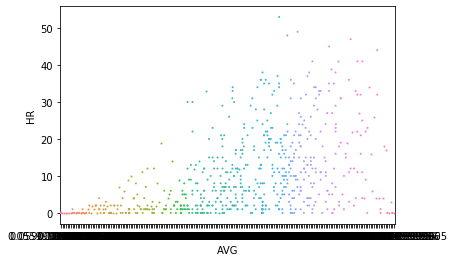

In [6]:
import seaborn as sns

sns.stripplot(batter.AVG, batter.HR, jitter=True, size=2)

#### - swarmplot

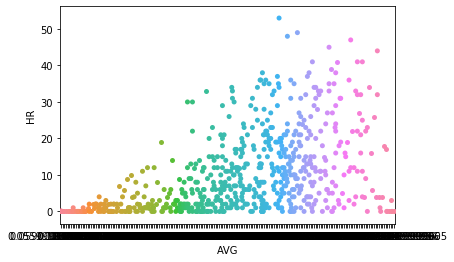

In [7]:
sns.swarmplot(batter.AVG, batter.HR)

## Grouping

### 1. 출루율(OBP)과 장타율(SLG)

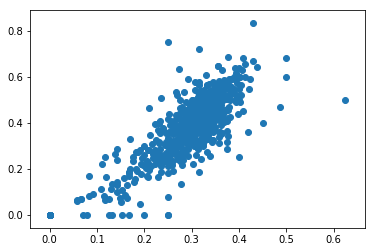

In [37]:
fig, ax = plt.subplots()
ax.scatter(batter.OBP, batter.SLG)

### 2. OPS(출루율과 장타율의 합)으로 Grouping

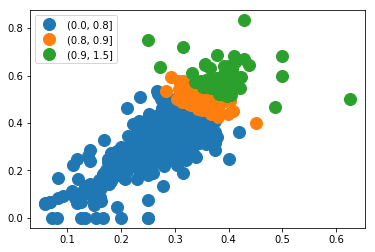

In [46]:
groups = batter.groupby(pd.cut(batter['OPS'], [0, 0.8, 0.9, 1.5]))

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.OBP, group.SLG, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

### 3. 팀별로 Grouping

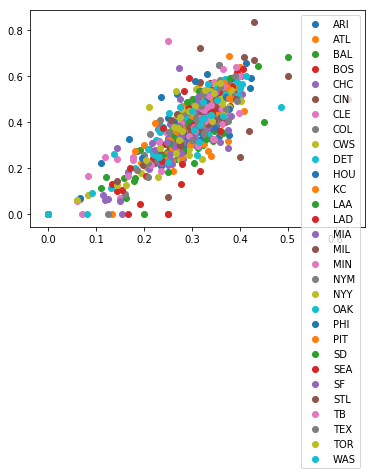

In [48]:
groups = batter.groupby('Team')

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.scatter(group.OBP, group.SLG, label=name)
ax.legend()

### 4. Guide Line 추가

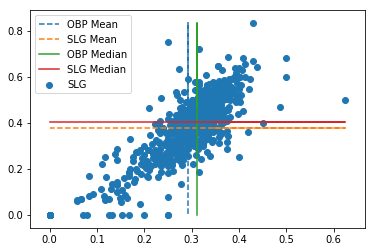

In [55]:
fig, ax = plt.subplots()
ax.scatter(batter.OBP, batter.SLG)

row = batter.shape[0]

ax.plot([batter.OBP.mean()] * row, batter.SLG , label='OBP Mean', linestyle='--')
ax.plot(batter.OBP, [batter.SLG.mean()] * row, label='SLG Mean', linestyle='--')
ax.plot([batter.OBP.median()] * row, batter.SLG , label='OBP Median', linestyle='-')
ax.plot(batter.OBP, [batter.SLG.median()] * row, label='SLG Median', linestyle='-')
ax.legend()

plt.show()

## 그룹간 비교 비교

### 1. 팀별 홈런(HR), 도루(SB)

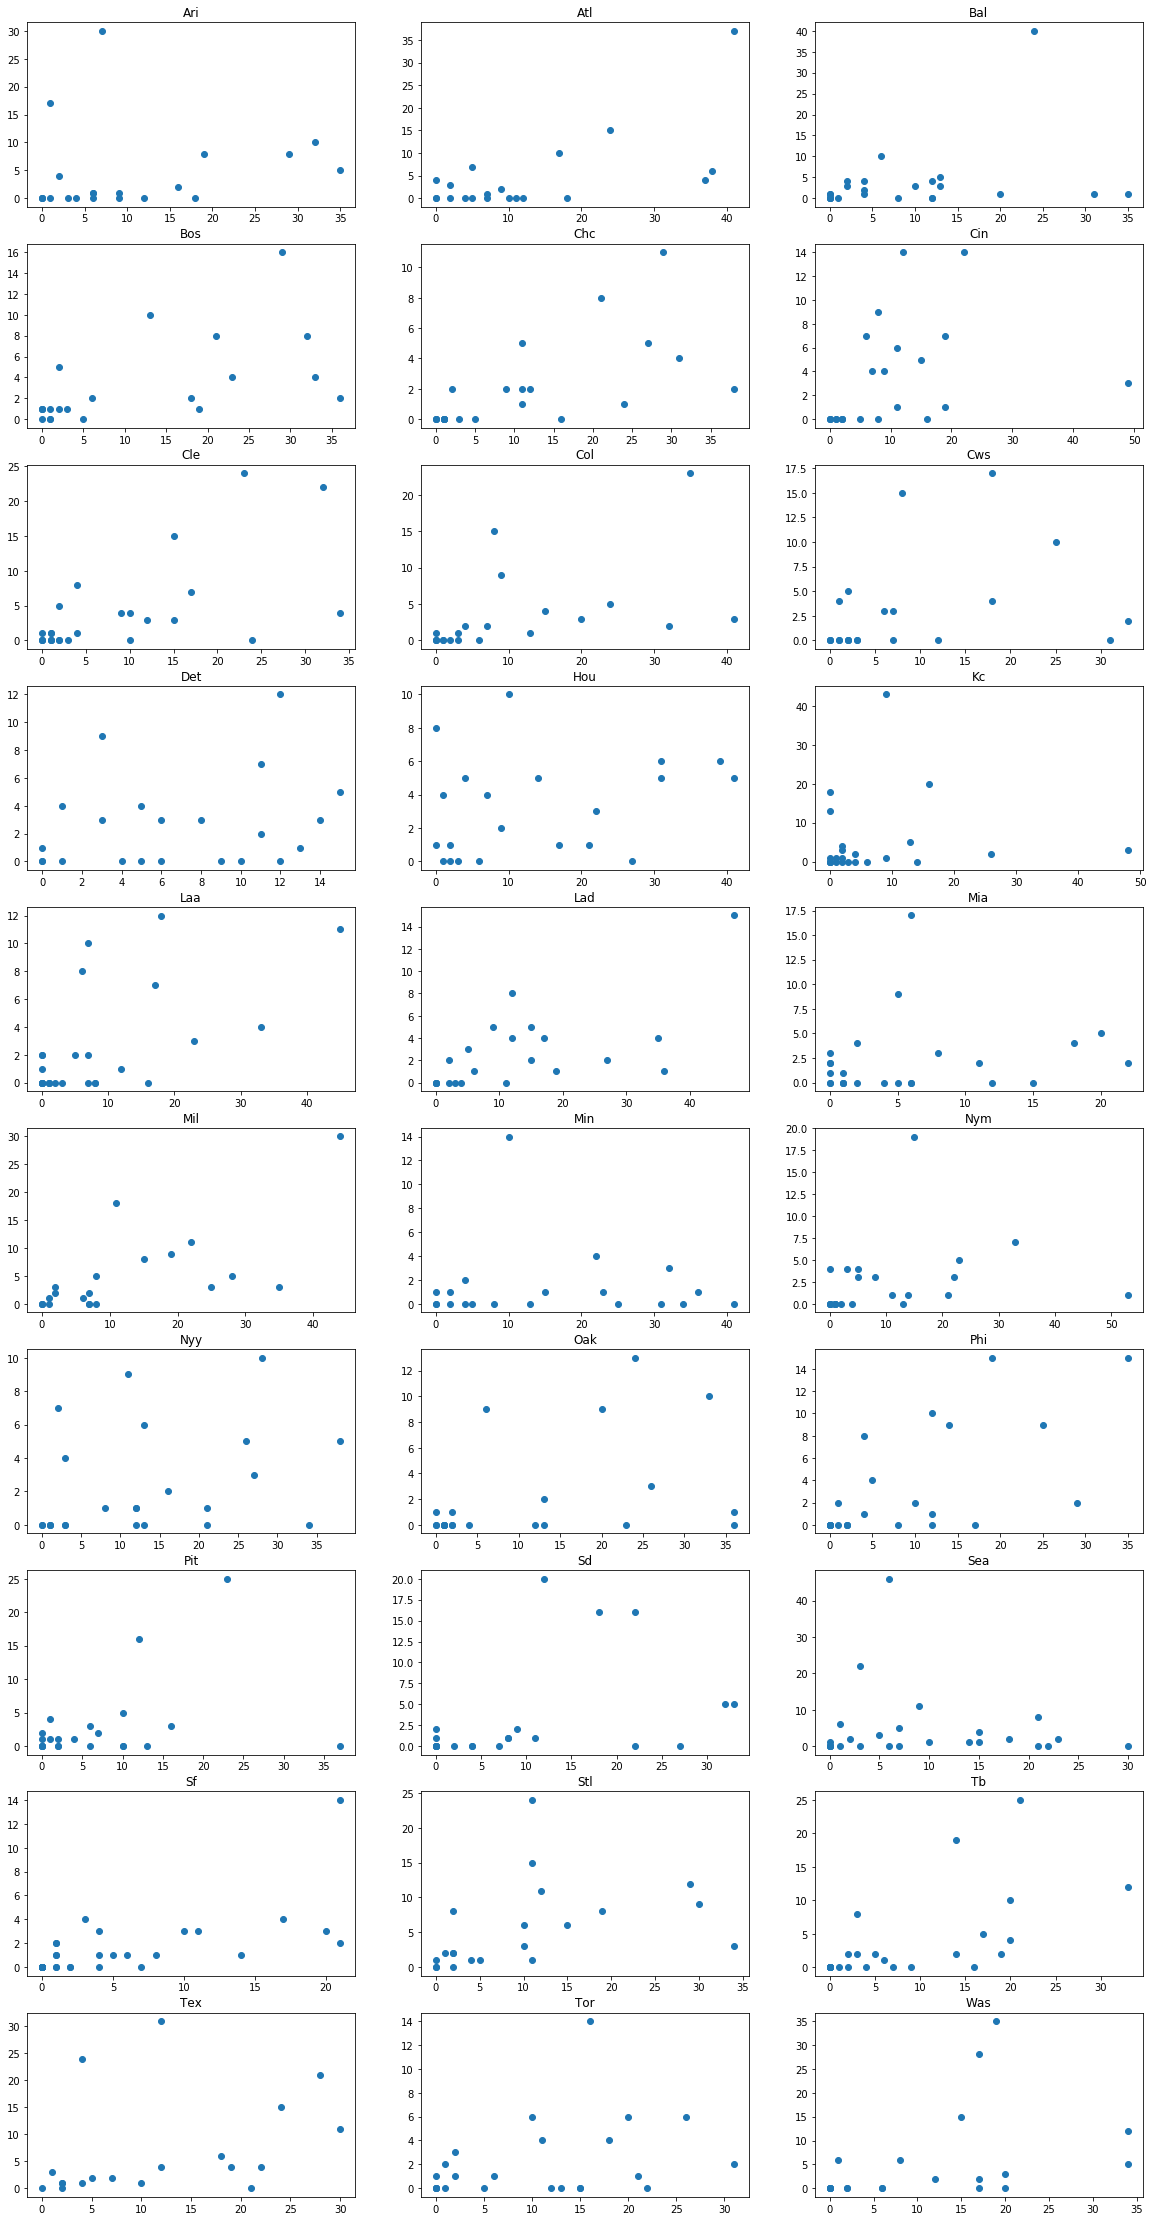

In [79]:
groups = batter.groupby('Team')

teamcnt = len(batter.Team.unique())
colcnt = 3
idx = 1

plt.figure(figsize=(20,40)) # 가로, 세로
for name, group in groups:
    plt.subplot(teamcnt / colcnt, colcnt, idx)
    plt.scatter(group.HR, group.SB)
    plt.title(name.title())
    idx += 1
    

## Multi Regression Line 활용

### 1. 타석수(AB)와 타율(AVG)

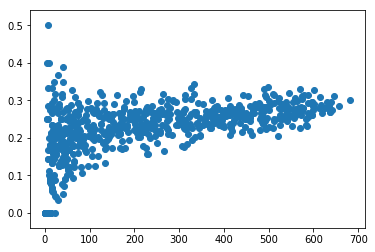

In [80]:
fig, ax = plt.subplots()
ax.scatter(batter.AB, batter.AVG)

### 2. 전체 데이터에 대한 선형회귀 라인 추가

In [89]:
from sklearn.linear_model import LinearRegression
X = batter['AB'].values.reshape(-1, 1)
y = batter['AVG'].values
lm = LinearRegression().fit(X, y)

pred = lm.predict(X)
pred[:10]

array([0.31402753, 0.30922188, 0.30721953, 0.30621835, 0.30581788,
       0.30501694, 0.30501694, 0.30461647, 0.30401576, 0.30301458])

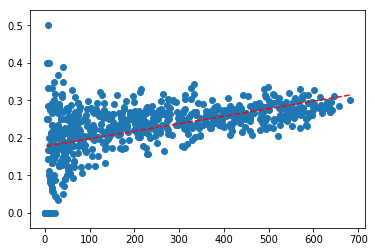

In [86]:
fig, ax = plt.subplots()
ax.scatter(batter.AB, batter.AVG)

ax.plot(batter.AB, pred , label='total LM', color='red', linestyle='--')

### 3. 300 타석 이상 선형회귀라인 추가

In [87]:
batter.AB.describe()

count    694.000000
mean     233.564841
std      191.287378
min        1.000000
25%       56.000000
50%      191.000000
75%      392.500000
max      681.000000
Name: AB, dtype: float64

In [90]:
from sklearn.linear_model import LinearRegression
data = batter.query('AB > 300')
X = data['AB'].values.reshape(-1, 1)
y = data['AVG'].values
lm = LinearRegression().fit(X, y)

pred2 = lm.predict(X)
pred2[:10]

array([0.28944467, 0.28664533, 0.28547894, 0.28489574, 0.28466246,
       0.2841959 , 0.2841959 , 0.28396262, 0.28361271, 0.28302951])

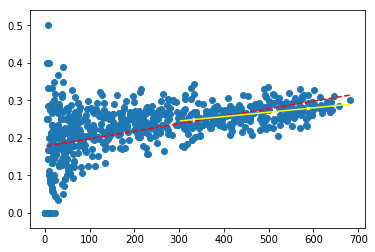

In [92]:
fig, ax = plt.subplots()
ax.scatter(batter.AB, batter.AVG)

ax.plot(batter.AB, pred , label='total LM', color='red', linestyle='--')
ax.plot(data.AB, pred2, label='over 300 LM', color='yellow', linestyle='-')

## Data Segmentation

### 1. 타석당 타점(RBI/AB)과 출루율(OBP)

Text(0, 0.5, 'OBP')

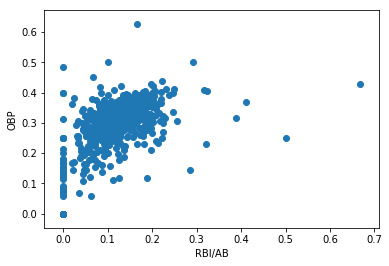

In [11]:
fig, ax = plt.subplots()
ax.scatter(batter.RBI/batter.AB, batter.OBP)
ax.set_xlabel('RBI/AB')
ax.set_ylabel('OBP')

### 2. segmentation 

- RBI/AB : [0, 25, 75, 100]
- OBP : [0, 25, 100]

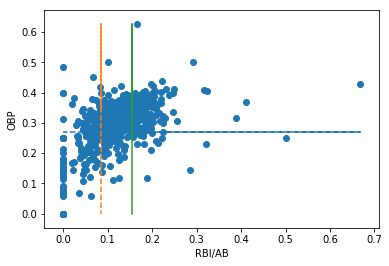

In [24]:
fig, ax = plt.subplots()
ax.scatter(batter.RBI/batter.AB, batter.OBP)
ax.set_xlabel('RBI/AB')
ax.set_ylabel('OBP')

row = batter.shape[0]

# 구분점
obp1q = batter.OBP.describe()[4]
rbi1q = (batter.RBI/batter.AB).describe()[4]
rbi3q = (batter.RBI/batter.AB).describe()[6]

ax.plot(batter.RBI/batter.AB, [obp1q] * row , linestyle='--')
ax.plot([rbi1q] * row, batter.OBP, linestyle='--')
ax.plot([rbi3q] * row, batter.OBP, linestyle='-')

## 대상별/구간별 상관관계

### 1. 삼진률(SO/AB), 타율(AVG)

상관계수 : -0.46713192470286813 


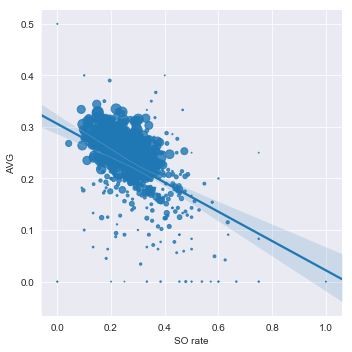

In [53]:
import seaborn as sns
batter['SO rate'] = batter.SO / batter.AB
print('상관계수 : %s ' % str(batter['SO rate'].corr(batter['AVG'])))

# 타석을 marker의 크기로 표현
size = batter.AB / 5
sns.lmplot(x="SO rate", y="AVG", data=batter[['SO rate', 'AVG', 'AB']], scatter_kws={"s": size})
sns.set_style("darkgrid")

### 2. 구간별 상관관계

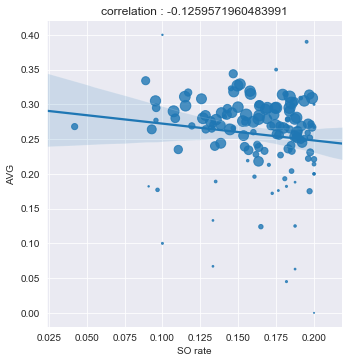

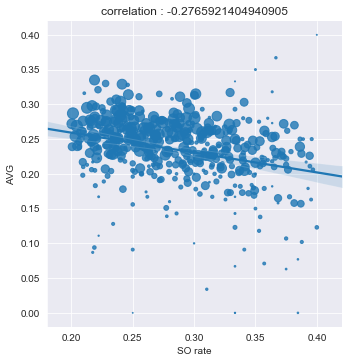

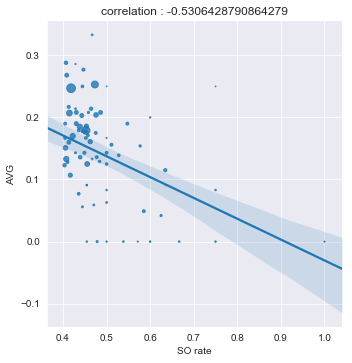

In [87]:
groups = batter.groupby(pd.cut(batter["SO rate"], [0, 0.2, 0.4, 1]))

for name, group in groups:
    size = group.AB / 5
    sns.lmplot(x="SO rate", y="AVG", data=group[['SO rate', 'AVG', 'AB']], scatter_kws={"s": size})
    ax = plt.gca()
    ax.set_title('correlation : %s' % str(group['SO rate'].corr(group['AVG'])))

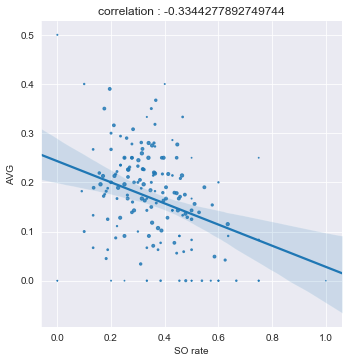

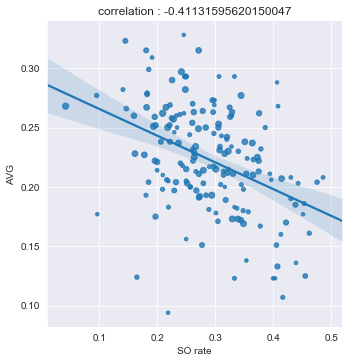

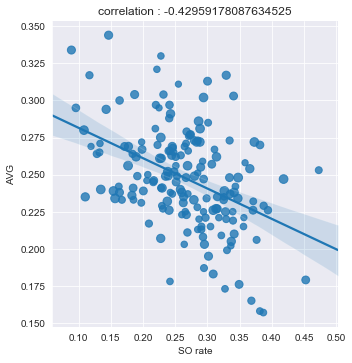

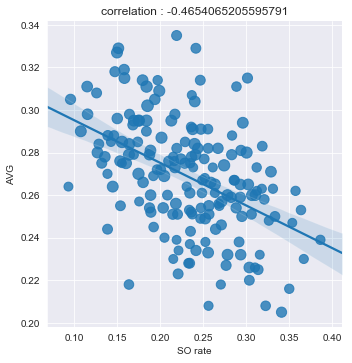

In [94]:
groups = batter.groupby(pd.cut(batter["AB"], np.array(batter['AB'].quantile([0,.25,.5,.75,1]))))

for name, group in groups:
    size = group.AB / 5
    sns.lmplot(x="SO rate", y="AVG", data=group[['SO rate', 'AVG', 'AB']], scatter_kws={"s": size})
    ax = plt.gca()
    ax.set_title('correlation : %s' % str(group['SO rate'].corr(group['AVG'])))

### 3. 대상별 상관관계

상관계수 : -0.7325339763095201 


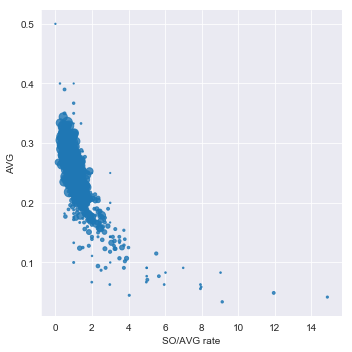

In [99]:
import seaborn as sns
batter['SO/AVG rate'] = batter['SO rate'] / batter['AVG']
data = batter.replace([np.inf, -np.inf], np.nan).dropna()
print('상관계수 : %s ' % str(data['SO/AVG rate'].corr(data['AVG'])))

size = batter.AB / 5
sns.lmplot(x="SO/AVG rate", y="AVG", data=batter[['SO/AVG rate', 'AVG', 'AB']], scatter_kws={"s": size})

## 가시성 확보

### 1. 영역별 배경색 조절 
- 타석(AB), 장타율(SLG)


Text(0, 0.5, 'SLG')

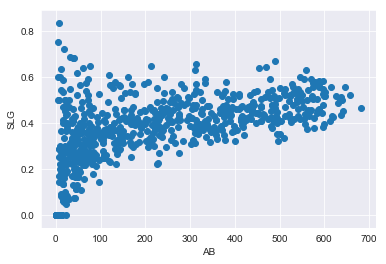

In [100]:
fig, ax = plt.subplots()
ax.scatter(batter.AB, batter.SLG)
ax.set_xlabel('AB')
ax.set_ylabel('SLG')

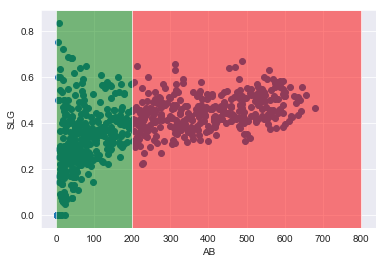

In [102]:
fig, ax = plt.subplots()
ax.scatter(batter.AB, batter.SLG)
ax.set_xlabel('AB')
ax.set_ylabel('SLG')

ax.axvspan(0, 200, facecolor='green', alpha=0.5)
ax.axvspan(200, 800, facecolor='red', alpha=0.5)

### 2. ordered boxplot

- 팀(Team), 홈런(HR)

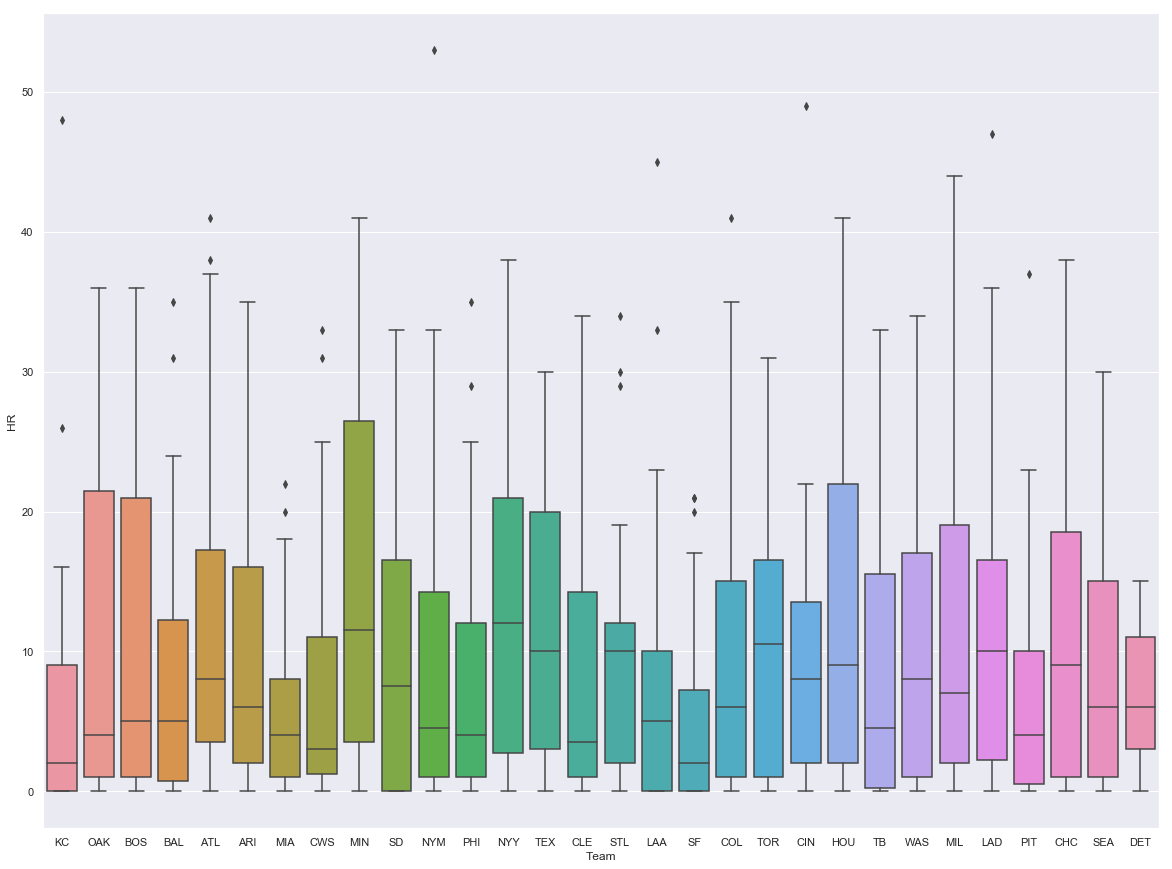

In [107]:
sns.set(rc={'figure.figsize':(20,15)})
sns.boxplot('Team', 'HR', data=batter)

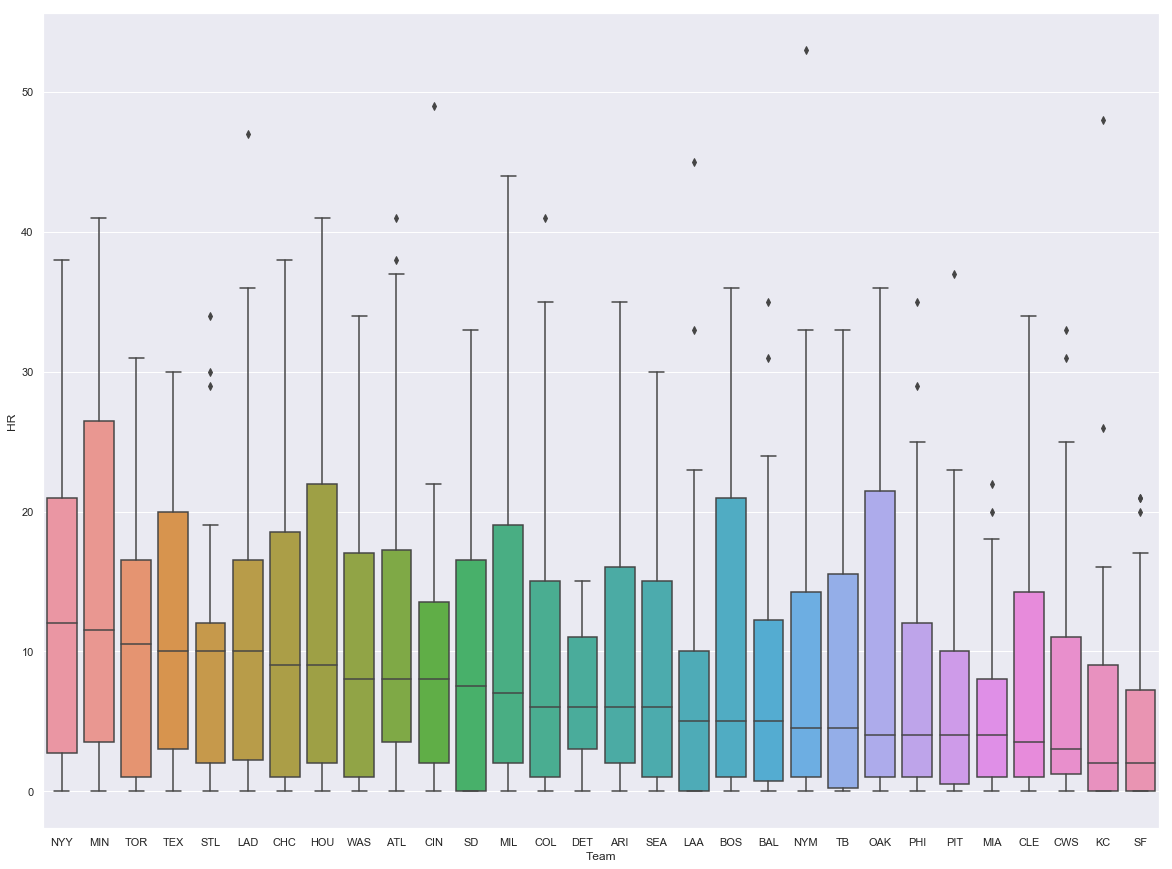

In [114]:
grouped = batter.groupby("Team")
sorteddata = pd.DataFrame({col:vals['HR'] for col, vals in grouped}).median().sort_values(ascending=False)
sns.boxplot('Team', 'HR', data=batter, order=sorteddata.index)